In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score , recall_score , f1_score , confusion_matrix
from sklearn.metrics import roc_curve , auc
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
# Load the dataset
data = pd.read_csv("inf.csv")
data = data.drop(['Unnamed: 0'],axis = 1)

In [3]:
# Split the data into features and target variable
X = data.drop('Pathogen Test Result', axis=1)
y = data['Pathogen Test Result']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Create a neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Train the model on the training set
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
463/463 [==============================] - 2s 2ms/step - loss: 38.3547 - accuracy: 0.5251
Epoch 2/100
463/463 [==============================] - 1s 2ms/step - loss: 0.7256 - accuracy: 0.5264
Epoch 3/100
463/463 [==============================] - 1s 2ms/step - loss: 0.7170 - accuracy: 0.5289
Epoch 4/100
463/463 [==============================] - 1s 2ms/step - loss: 0.7097 - accuracy: 0.5351
Epoch 5/100
463/463 [==============================] - 1s 2ms/step - loss: 0.7118 - accuracy: 0.5353
Epoch 6/100
463/463 [==============================] - 1s 2ms/step - loss: 0.7262 - accuracy: 0.5360
Epoch 7/100
463/463 [==============================] - 1s 2ms/step - loss: 0.7176 - accuracy: 0.5412
Epoch 8/100
463/463 [==============================] - 1s 2ms/step - loss: 0.7122 - accuracy: 0.5436
Epoch 9/100
463/463 [==============================] - 1s 2ms/step - loss: 0.7247 - accuracy: 0.5347
Epoch 10/100
463/463 [==============================] - 1s 2ms/step - loss: 0.7170 - accur

463/463 [==============================] - 1s 2ms/step - loss: 0.6630 - accuracy: 0.5659
Epoch 82/100
463/463 [==============================] - 1s 2ms/step - loss: 0.6669 - accuracy: 0.5584
Epoch 83/100
463/463 [==============================] - 1s 1ms/step - loss: 0.6637 - accuracy: 0.5693
Epoch 84/100
463/463 [==============================] - 1s 2ms/step - loss: 0.6644 - accuracy: 0.5692
Epoch 85/100
463/463 [==============================] - 1s 2ms/step - loss: 0.6598 - accuracy: 0.5719
Epoch 86/100
463/463 [==============================] - 1s 2ms/step - loss: 0.6631 - accuracy: 0.5670
Epoch 87/100
463/463 [==============================] - 1s 2ms/step - loss: 0.6640 - accuracy: 0.5645
Epoch 88/100
463/463 [==============================] - 1s 2ms/step - loss: 0.6607 - accuracy: 0.5709
Epoch 89/100
463/463 [==============================] - 1s 1ms/step - loss: 0.6623 - accuracy: 0.5646
Epoch 90/100
463/463 [==============================] - 1s 2ms/step - loss: 0.6603 - accuracy: 

In [8]:
# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

116/116 [==============================] - 0s 1ms/step


In [9]:
y_pred2 = model.predict(X_train)
y_pred2 = np.round(y_pred)

463/463 [==============================] - 1s 1ms/step


In [10]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2),'%')

Accuracy: 57.91 %


In [11]:
cm = confusion_matrix(y_test, y_pred)

array([[ 770,  965],
       [ 594, 1375]], dtype=int64)

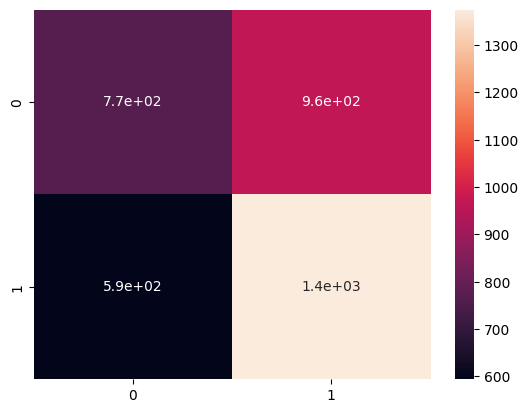

In [12]:
snb.heatmap(cm,annot=True)
cm

In [13]:
# precision for testing
print('for testing : ' , round(precision_score(y_test , y_pred)*100,2),'%')

for testing :  58.76 %


In [14]:
# Recall for testing 
print('for testing : ' , round(recall_score(y_test , y_pred)*100,2),'%')

for testing :  69.83 %


In [15]:
# f1_score for testing 
print('for testing : ' , round(f1_score(y_test , y_pred)*100,2),'%')

for testing :  63.82 %


In [16]:
# for sensitivity and specificity
tn, fp, fn, tp = cm.ravel()

In [17]:
specificity = tn / (tn+fp)
print('specificity for data is : ',round(specificity*100,2),'%')

specificity for data is :  44.38 %


In [18]:
sensitivity = tp / (tp+fn)
print('sensitivity for data is : ',round(sensitivity*100,2),'%')

sensitivity for data is :  69.83 %


In [19]:
#ROC and AUC
fpr, tpr, threshold = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

In [20]:
print('Area under curve : ',round(roc_auc*100,2),'%')

Area under curve :  57.11 %


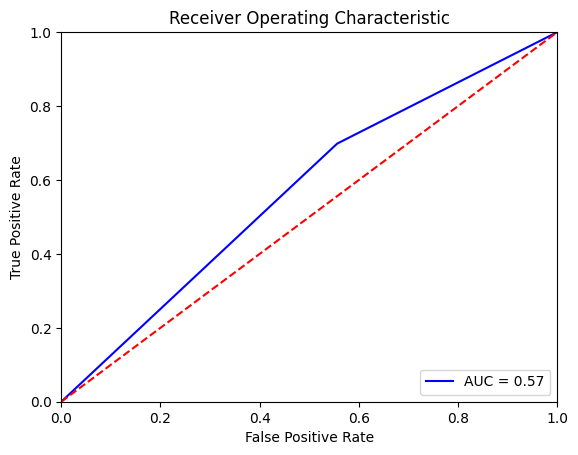

In [21]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()